In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



plt.style.use('fivethirtyeight')
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.dpi'] = 70
plt.rcParams['ytick.alignment'] = 'center'

raw = pd.read_csv('WDI_CSV_2024_05_30/WDICSV.csv')

countries = ['BIH', 'HRV', 'MKD', 'MNE', 'SRB', 'SVN', 'EUU']

colors = {
    'Bosnia and Herzegovina': "#FAC205",
    'Croatia': "#0343DF",
    'North Macedonia': "#F97306",
    'Montenegro': "#7E1E9C",
    'Serbia': "#E50000",
    'Slovenia': "#008000",
    'avg. EU': "#CCCCCC"
}

i = 0

df = raw[raw['Country Code'].isin(countries)].copy()
pre_1990 = [str(x) for x in range(1960, 1990)]
df.drop(pre_1990, axis=1, inplace=True)

df = df.rename(columns={'Country Name': 'CountryName', 'Country Code': 'CountryCode', 'Indicator Name': 'IndicatorName', 'Indicator Code': 'IndicatorCode'})
columns = ['CountryName', 'CountryCode', 'IndicatorName', 'IndicatorCode']
df = pd.melt(df, id_vars=columns, var_name='Year', value_name='Value')

df.dropna(inplace=True)
df['Year'] = df['Year'].astype(int)



In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177158 entries, 3 to 355083
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   CountryName    177158 non-null  object 
 1   CountryCode    177158 non-null  object 
 2   IndicatorName  177158 non-null  object 
 3   IndicatorCode  177158 non-null  object 
 4   Year           177158 non-null  int32  
 5   Value          177158 non-null  float64
dtypes: float64(1), int32(1), object(4)
memory usage: 8.8+ MB


In [9]:
import matplotlib.pyplot as plt
import numpy as np

def plot_indicator(indicators, title=None, xlim=None, ylim=None, loc=0, loc2=0, drop_eu=False, filename=None):
    
    lines = ['-','--']
    line_styles = []
    fig, ax = plt.subplots()
    fig.tight_layout()
    
    indicators = indicators if isinstance(indicators, list) else [indicators]
    for line, (name, indicator) in zip(lines, indicators):
        ls, = plt.plot(np.nan, linestyle=line, color='#999999')
        line_styles.append([ls, name])
        
        df_ind = df[(df.IndicatorCode == indicator)]
        group = df_ind.groupby(['CountryName'])
        
        for country, values in group:
            country_values = values.groupby('Year').mean()
            
            if country == 'European Union': 
                if drop_eu:
                    continue 
                ax.plot(country_values, label=country,
                       linestyle='--', color='black', linewidth=1, zorder=1)
            elif country_values.shape[0] > 1:
                ax.plot(country_values, label=country, linestyle=line,
                       color=colors[country], linewidth=2.5)
                
        if line == lines[0]:
            legend = plt.legend(loc=loc)
            
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    if xlim:
        ax.set_xticks(np.arange(xlim[0], xlim[1] + 1))
    
    # Set rotation for x-axis labels
    plt.xticks(rotation=45)
    
    fig.subplots_adjust(top=0.94)
    
    if title:
        ax.set_title(title)
    else:
        ax.set_title(df_ind.IndicatorName.values[0])
    
    if len(indicators) > 1:
        plt.legend(*zip(*line_styles), loc=loc2)
        ax.add_artist(legend)
    
    # Save the plot to a file if filename is provided
    if filename:
        plt.savefig(filename)
    
    plt.show()



        
        
        

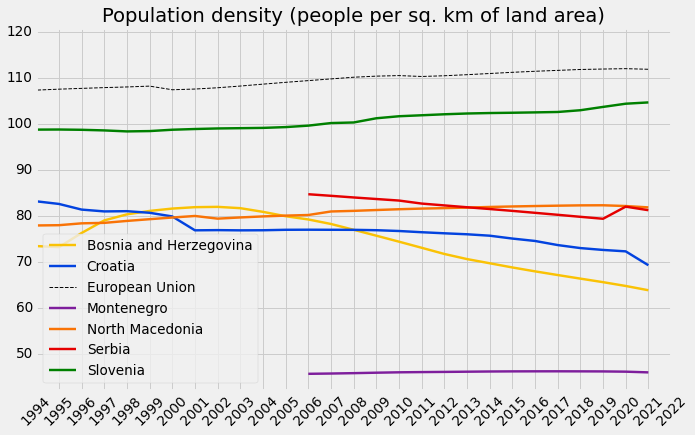

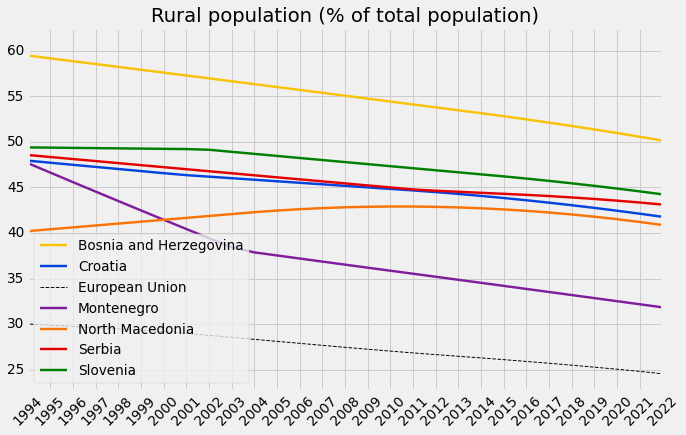

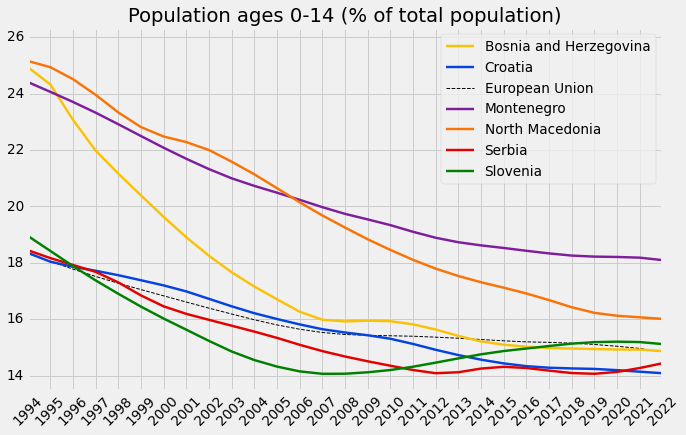

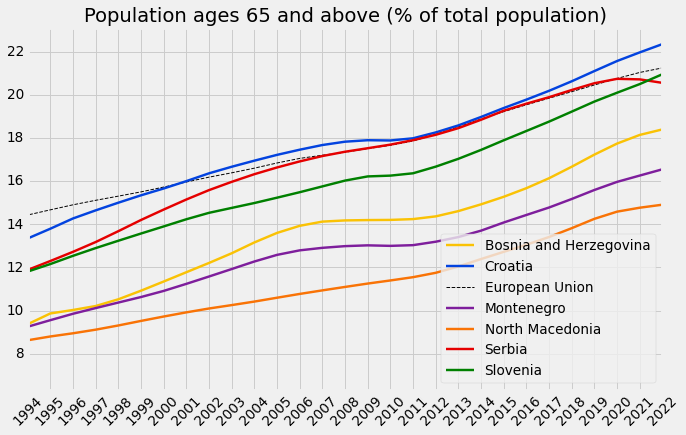

In [15]:
population = [
    ('pop_dens', 'EN.POP.DNST'),     # Population density 
    ('rural', 'SP.RUR.TOTL.ZS'),     # Rural population 
    ('under14', 'SP.POP.0014.TO.ZS'),# Population, ages 0-14 
    ('above65', 'SP.POP.65UP.TO.ZS'),# Population ages 65 and above 
]

for indicator in population:
    plot_indicator(indicator, loc=0, xlim=(1994, 2022), filename=indicator[0])
    
    plt.show()

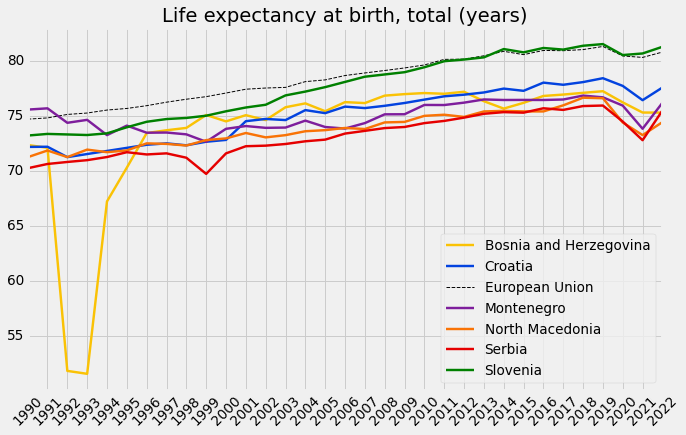

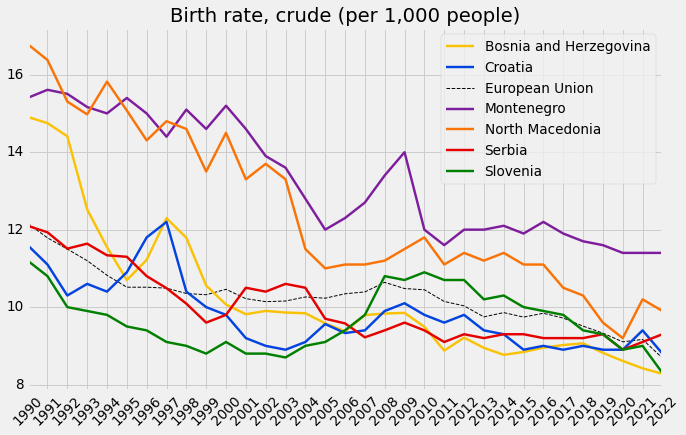

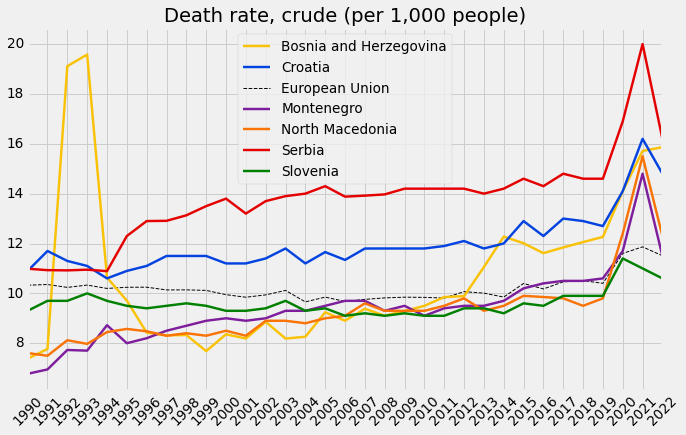

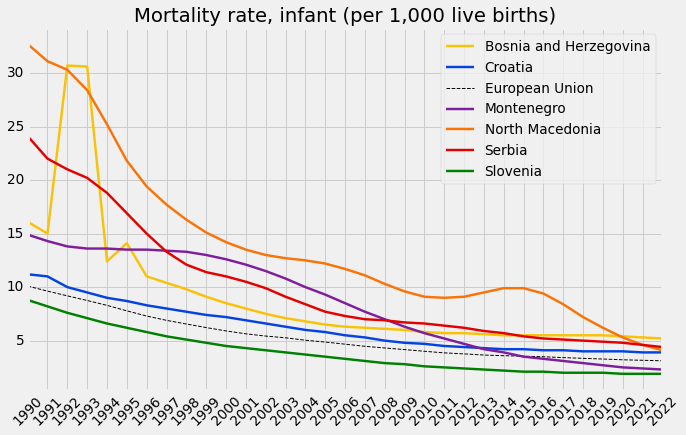

In [14]:
birth_death = [
    ('life_exp', 'SP.DYN.LE00.IN'), # Life expectancy at birth
    ('birth', 'SP.DYN.CBRT.IN'),    # Birth rate, crude 
    ('death', 'SP.DYN.CDRT.IN'),    # Death rate, crude 
    ('mort', 'SP.DYN.IMRT.IN'),     # Mortality rate, infant 
]

for indicator in birth_death:
    plot_indicator(indicator, loc=0, xlim=(1990, 2022), filename=indicator[0])

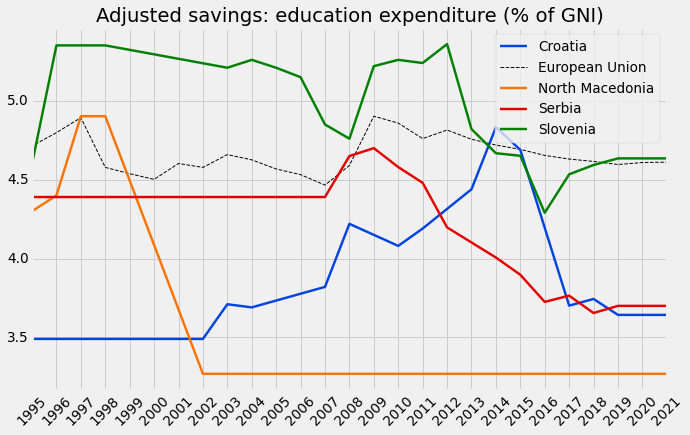

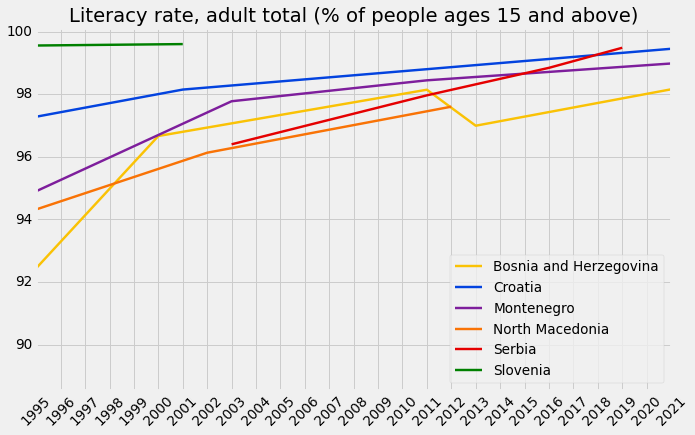

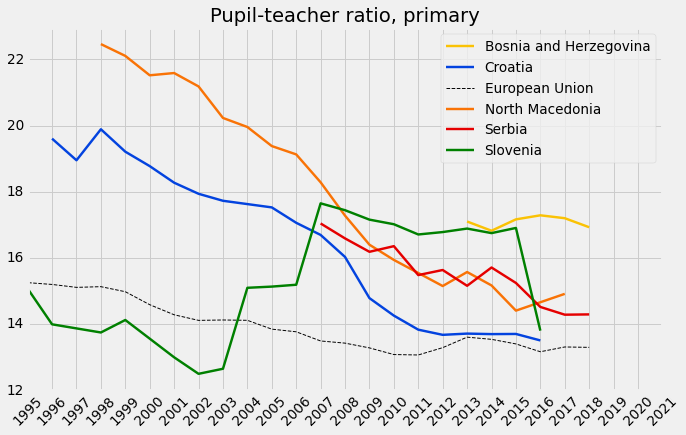

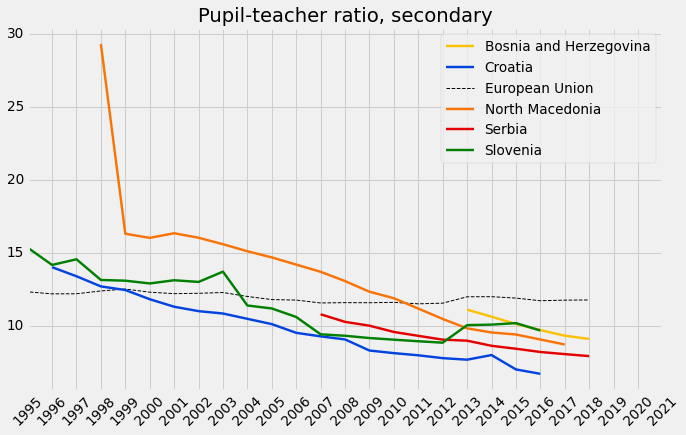

In [17]:
education = [
    ('education', 'NY.ADJ.AEDU.GN.ZS'), # education expenditure 
    ('literacy', 'SE.ADT.LITR.ZS'),     # Adult literacy rate
    ('teach_prim', 'SE.PRM.ENRL.TC.ZS'),# Pupil-teacher ratio in primary education
    ('teach_sec', 'SE.SEC.ENRL.TC.ZS'), # Pupil-teacher ratio in secondary education 
]

for indicator in education:
    plot_indicator(indicator, xlim=(1995, 2021), filename=indicator[0])

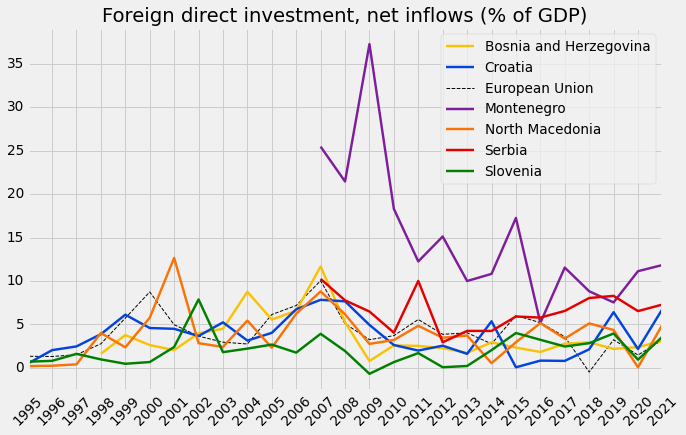

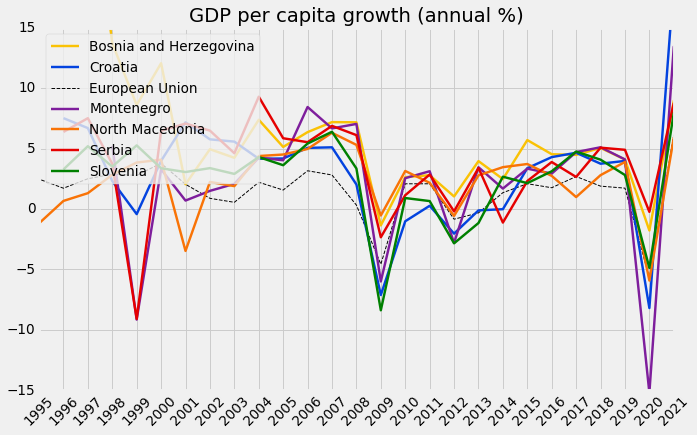

In [19]:
gdp = [
    ('FDI', 'BX.KLT.DINV.WD.GD.ZS'),          # GDP per capita 
    ('gdp_growth', 'NY.GDP.PCAP.KD.ZG')
]

for indicator in gdp:
    if indicator[0] == 'gdp_growth':
        plot_indicator(indicator, loc=2, filename=indicator[0],
                       xlim=(1995, 2021), ylim=(-15, 15), 
                      )
    else:
        plot_indicator(indicator, loc=0, xlim=(1995, 2021), filename=indicator[0])